In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cdstoolbox as ct

@ct.application(title='Download data')
@ct.output.download()
def download_application():
    data = ct.catalogue.retrieve(
        'reanalysis-era5-land',
        {
            'variable': [
                '2m_temperature', 'total_precipitation', 'volumetric_soil_water_layer_1',
            ],
            'year': '2019',
            'month': '12',
            'day': [
                '01', '02', '03',
                '04', '05', '06',
                '07', '08', '09',
                '10', '11', '12',
                '13', '14', '15',
                '16', '17', '18',
                '19', '20', '21',
                '22', '23', '24',
                '25', '26', '27',
                '28', '29', '30',
                '31',
            ],
            'time': '12:00',
        }
    )
    return data

In [2]:
dset = xr.open_dataset("download.nc")
print(dset)

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-28 03:31:06 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


In [3]:
# Total precipitation
print(dset['tp'])

<xarray.DataArray 'tp' (time: 31, latitude: 1801, longitude: 3600)>
[200991600 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    units:      m
    long_name:  Total precipitation


In [4]:
dset.head()

<xarray.Dataset>
Dimensions:    (latitude: 5, longitude: 5, time: 5)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 0.4
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 89.6
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-05T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-28 03:31:06 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [5]:
# Check the data type and null values present in fields
dset.info()

xarray.Dataset {
dimensions:
	latitude = 1801 ;
	longitude = 3600 ;
	time = 31 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 t2m(time, latitude, longitude) ;
		t2m:units = K ;
		t2m:long_name = 2 metre temperature ;
	float32 tp(time, latitude, longitude) ;
		tp:units = m ;
		tp:long_name = Total precipitation ;
	float32 swvl1(time, latitude, longitude) ;
		swvl1:units = m**3 m**-3 ;
		swvl1:long_name = Volumetric soil water layer 1 ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2020-11-28 03:31:06 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -o /cache/data7/adaptor.mars.internal-1606534235.165544-25342-11-ac130566-345a-4d22-a8e7-21270dbc736e.nc /cache/tmp/ac130566-345a-4d22-a8e7-21270dbc736e-adaptor.mars.internal-16065

In [6]:
# Check for missing values
dset.isnull().sum()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    t2m      int32 132392847
    tp       int32 132392847
    swvl1    int32 132392847

 Basic statistics 

In [7]:
median = np.median(np.median(pd.DataFrame(dset.t2m.values[:,:,0]).dropna(axis = 1)))
std = np.std(np.std(pd.DataFrame(dset.t2m.values[:,:,0]).dropna(axis = 1)))
variance = np.var(np.var(pd.DataFrame(dset.t2m.values[:,:,0]).dropna(axis = 1)))
print('median =',median)
print('std =',std)
print('variance =',variance)

median = 285.4597
std = 0.630653
variance = 5.807323


Fill nan Values

In [8]:
mean_t2m = np.mean(np.mean(pd.DataFrame(dset.t2m.values[:,:,0]).dropna(axis = 1)))
mean_tp = np.mean(np.mean(pd.DataFrame(dset.tp.values[:,:,0]).dropna(axis = 1)))
mean_swvl1 = np.mean(np.mean(pd.DataFrame(dset.swvl1.values[:,:,0]).dropna(axis = 1)))
print('mean_t2m =',mean_t2m)
print('mean_tp =',mean_tp)
print('mean_swvl1 =',mean_swvl1)
temp = dset.t2m.fillna(mean_t2m)
prec = dset.tp.fillna(mean_tp)
volume = dset.swvl1.fillna(mean_swvl1)
print('swvl1 :',dset.swvl1)
print('Volume :',volume)

mean_t2m = 280.67374
mean_tp = 0.00038970553
mean_swvl1 = 0.18569797
swvl1 : <xarray.DataArray 'swvl1' (time: 31, latitude: 1801, longitude: 3600)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.158244, 0.158139, ..., 0.158665, 0.158443],
        [0.206098, 0.206098, ..., 0.206098, 0.206098]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.158244, 0.158139, ..., 0.158665, 0.158443],
        [0.206098, 0.206098, ..., 0.206098, 0.206098]],

       ...,

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.158244, 0.158139, ..., 0.158665, 0.158443],
        [0.206098, 0.206098, ..., 0.206098, 0.206098]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.

Histogram

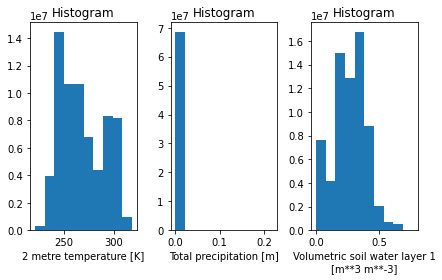

In [9]:
fig, axes = plt.subplots(ncols=3)
dset.t2m.plot(ax=axes[0])
dset.tp.plot(ax=axes[1])
dset.swvl1.plot(ax=axes[2])
plt.tight_layout()
plt.draw()

Plot a randomly chosen day from each of the datasets and use a sequential colormap for the plot.

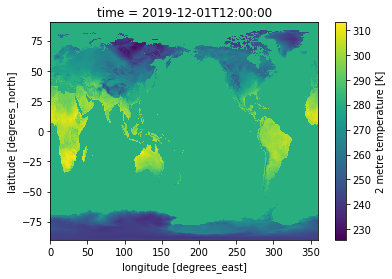

In [10]:
temp.isel(time=0).plot()

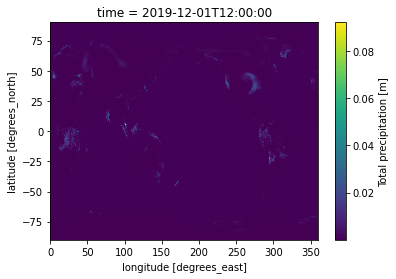

In [11]:
prec.isel(time=0).plot()

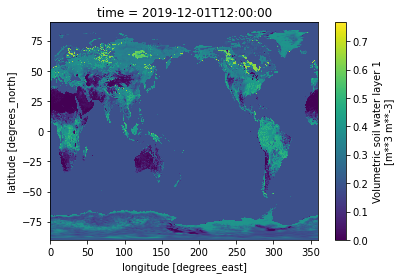

In [12]:
volume.isel(time=0).plot()

Preprocessing Geospatial Data

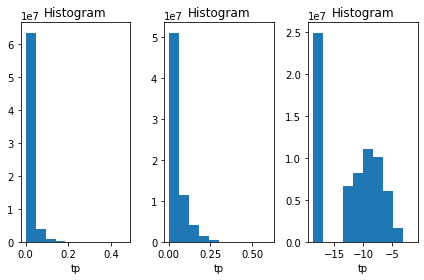

In [13]:
fig, axes = plt.subplots(ncols=3)
np.sqrt(dset.tp).plot.hist(ax=axes[0],bins = 10)
np.cbrt(dset.tp).plot.hist(ax=axes[1],bins = 10)
np.log(dset.tp).plot.hist(ax=axes[2],bins = 10)
plt.tight_layout()
plt.draw()

Deep Learning for Geospatial Data 

In [14]:
import torch
dtype = torch.float
device = torch.device("cpu")

x1 = dset.t2m.fillna(mean_t2m)
x2 = dset.swvl1.fillna(mean_swvl1)
x = np.concatenate((x1.values,x2.values),axis = 1)
y = dset.tp.fillna(mean_tp).values

In [15]:
N, D_in, H, D_out = 1, 3602, 3602, 1801
e = []
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, H, device=device, dtype=dtype, requires_grad=True)
w3 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)
lr = 1e-8
for t in range(100):
    y_p = torch.tanh(torch.tanh(torch.Tensor(x[0,:,:].T).mm(w1)).mm(w2)).mm(w3)
    loss = (y_p - torch.Tensor(y[0,:,:].T)).pow(2).sum()
#     print(y_p)
    print(t, loss.item())
    e.append(loss.item())
    w1.retain_grad()
    w2.retain_grad()
    w3.retain_grad()

    
    loss.backward()
    with torch.no_grad():
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad
        w3 -= lr * w3.grad

        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()


0 23548553216.0


C:\Users\User\anaconda3\envs\cnn\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


1 11183251456.0
2 6156067840.0
3 3522195968.0
4 1973748480.0
5 1114528640.0
6 611118912.0
7 373747072.0
8 205296176.0
9 108313088.0
10 67296688.0
11 36966836.0
12 20300616.0
13 11139810.0
14 6113775.0
15 3356161.5
16 1843085.0
17 1012804.5
18 557150.8125
19 307049.0
20 169732.671875
21 94308.0625
22 52849.01953125
23 30037.2578125
24 17462.71484375
25 10511.28125
26 6651.4658203125
27 4492.119140625
28 3269.82421875
29 2565.45458984375
30 2148.2294921875
31 1890.929931640625
32 1723.806640625
33 1608.207763671875
34 1522.647705078125
35 1455.1854248046875
36 1398.9622802734375
37 1350.2288818359375
38 1306.8720703125
39 1267.417236328125
40 1231.09033203125
41 1197.261474609375
42 1165.6002197265625
43 1135.8104248046875
44 1107.7149658203125
45 1081.18896484375
46 1056.07568359375
47 1032.198974609375
48 1009.489013671875
49 987.9078979492188
50 967.3441162109375
51 947.6726684570312
52 928.885986328125
53 910.947998046875
54 893.73583984375
55 877.278564453125
56 861.4973754882812
57

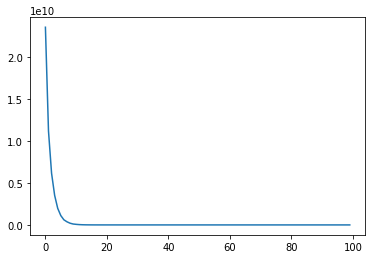

In [16]:
plt.plot(e)
plt.show()

# Q&A